In [7]:
import os
import pickle
import sys
import numpy as np
import pandas as pd

from lightning import Lightning

from numpy import random


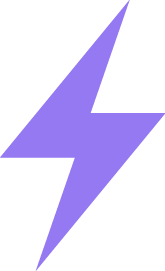

Connected to server at http://public.lightning-viz.org


<IPython.core.display.Javascript object>

In [2]:
lgn = Lightning(ipython=True, host='http://public.lightning-viz.org')

In [3]:
countries = ['ISO', 'SLE', 'COD', 'CAF', 'TCD', 'AGO', 'GNB', 'GNQ', 'MLI', 'MWI', 
             'BDI', 'NGA', 'SOM', 'SSD', 'MOZ', 'CIV', 'CMR', 'GIN', 'BFA', 'AFG', 
             'ZMB', 'MRT', 'SWZ', 'LSO', 'TGO', 'BEN', 'COG', 'COM', 'LBR', 'PAK', 
             'UGA', 'NER', 'DJI', 'YEM', 'TZA', 'GMB', 'RWA', 'ETH', 'KEN', 'TJK', 
             'GHA', 'SEN', 'ERI', 'MMR', 'ZWE', 'ZAF', 'GAB', 'KHM', 'TLS', 'IND', 
             'TKM', 'PNG', 'HTI', 'LAO', 'UZB', 'STP', 'BOL', 'MDG', 'NPL', 'ESH', 
             'BGD', 'NAM', 'SLB', 'AZE', 'BTN', 'KIR', 'BWA', 'KGZ', 'FSM', 'IRQ', 
             'MAR', 'PRY', 'GUY', 'MNG', 'GTM', 'DZA', 'DOM', 'IDN', 'VUT', 'HND', 
             'PRK', 'KAZ', 'TTO', 'JAM', 'BRA', 'EGY', 'PHL', 'WSM', 'PSE', 'SUR', 
             'TON', 'GEO', 'CPV', 'NIC', 'ECU', 'ARM', 'PER', 'IRN', 'SLV', 'JOR', 
             'COL', 'TUN', 'VCT', 'CHN', 'FJI', 'PAN', 'VEN', 'LBY', 'MEX', 'TUR', 
             'ALB', 'ABW', 'VNM', 'BLZ', 'MDA', 'MDV', 'NCL', 'SYR', 'GUF', 'SAU', 
             'ARG', 'MUS', 'URY', 'UKR', 'ROU', 'MKD', 'LCA', 'THA', 'BRB', 'GUM', 
             'MNE', 'VIR', 'LKA', 'GRD', 'SYC', 'BHS', 'ATG', 'LBN', 'CRI', 'BGR', 
             'OMN', 'KWT', 'BIH', 'PYF', 'BHR', 'LVA', 'MTQ', 'QAT', 'CHL', 'PRI', 
             'GLP', 'ARE', 'USA', 'BLR', 'SVK', 'POL', 'LTU', 'MLT', 'HRV', 'MYT', 
             'REU', 'HUN', 'CAN', 'TWN', 'BRN', 'CUB', 'MAC', 'NZL', 'GBR', 'MYS', 
             'EST', 'KOR', 'AUS', 'CYP', 'GRC', 'CHE', 'NLD', 'ISR', 'DNK', 'BEL', 
             'AUT', 'IRL', 'DEU', 'FRA', 'ESP', 'ITA', 'PRT', 'CZE', 'NOR', 'SVN', 
             'FIN', 'JPN', 'SWE', 'LUX', 'SGP', 'ISL', 'HKG', 'FLK', 'SMR', 'TCA', 
             'VAT', 'RUS', 'GRL']

In [10]:
    # Dict of country codes
    codes = {'Afghanistan': 'AFG', 'Albania': 'ALB', 'Algeria': 'DZA',
             'American Samoa': 'ASM', 'Angola': 'AGO',
             'Antigua and Barbuda': 'ATG', 'Argentina': 'ARG',
             'Armenia': 'ARM', 'Aruba': 'ABW', 'Australia': 'AUS',
             'Austria': 'AUT', 'Azerbaijan': 'AZE', 'The Bahamas': 'BHS',
             'Bahrain': 'BHR', 'Bangladesh': 'BGD', 'Barbados': 'BRB',
             'Belarus': 'BLR', 'Belgium': 'BEL', 'Belize': 'BLZ',
             'Benin': 'BEN', 'Bermuda': 'BMU', 'Bhutan': 'BTN',
             'Bolivia': 'BOL', 'Bosnia & Herzegovina': 'BIH',
             'Botswana': 'BWA', 'Brazil': 'BRA', 'Brunei Darussalam': 'BRN',
             'Bulgaria': 'BGR', 'Burkina Faso': 'BFA', 'Burundi': 'BDI',
             'Cambodia': 'KHM', 'Cameroon': 'CMR', 'Canada': 'CAN',
             'Cape Verde': 'CPV', 'Central African Rep.': 'CAF', 'Chad': 'TCD',
             'Chile': 'CHL', 'China': 'CHN', 'Hong Kong': 'HKG',
             'Macao': 'MAC', 'Colombia': 'COL', 'Comoros': 'COM',
             'Democratic Republic of Congo': 'ZAR', 'Republic of Congo': 'COG',
             'Costa Rica': 'CRI', 'Côte d\'Ivoire': 'CIV', 'Croatia': 'HRV',
             'Cuba': 'CUB', 'Czech Republic': 'CZE', 'Denmark': 'DNK',
             'Djibouti': 'DJI', 'Dominica': 'DMA', 'Dominican Republic': 'DOM',
             'Ecuador': 'ECU', 'Egypt': 'EGY', 'El Salvador': 'SLV',
             'Equatorial Guinea': 'GNQ', 'Eritrea': 'ERI', 'Estonia': 'EST',
             'Ethiopia': 'ETH', 'Faeroe Islands': 'FRO', 'Fiji': 'FJI',
             'Finland': 'FIN', 'France': 'FRA', 'French Polynesia': 'PYF',
             'Gabon': 'GAB', 'The Gambia': 'GMB', 'Georgia': 'GEO',
             'Germany': 'DEU', 'Ghana': 'GHA', 'Gibraltar': 'GIB',
             'Greece': 'GRC', 'Greenland': 'GRL', 'Grenada': 'GRD',
             'Guadeloupe': 'GLP', 'Guam': 'GUM', 'Guatemala': 'GTM',
             'French Guiena': 'GUF', 'Guinea': 'GNB', 'Guinea-Bissau': 'GIN',
             'Guyana': 'GUY', 'Haiti': 'HTI', 'Honduras': 'HND',
             'Hungary': 'HUN', 'Iceland': 'ISL', 'India': 'IND',
             'Indonesia': 'IDN', 'Islamic Republic of Iran': 'IRN',
             'Iraq': 'IRQ', 'Ireland': 'IRL', 'Israel': 'ISR', 'Italy': 'ITA',
             'Jamaica': 'JAM', 'Japan': 'JPN', 'Jordan': 'JOR',
             'Kazakhstan': 'KAZ', 'Kenya': 'KEN', 'Kiribati': 'KIR',
             'South Korea': 'KOR', 'Kuwait': 'KWT', 'Kyrgyzstan': 'KGZ',
             'Lao People\'s Dem.Rep': 'LAO', 'Latvia': 'LVA', 'Lebanon': 'LBN',
             'Lesotho': 'LSO', 'Liberia': 'LBR', 'Libya': 'LBY',
             'Lithuania': 'LTU', 'Luxembourg': 'LUX', 'FYR Macedonia': 'MKD',
             'Madagascar': 'MDG', 'Malawi': 'MWI', 'Malaysia': 'MYS',
             'Maldives': 'MDV', 'Mali': 'MLI', 'Malta': 'MLT',
             'Martinique': 'MTQ', 'Mauritania': 'MRT', 'Mauritius': 'MUS',
             'Mexico': 'MEX', 'Moldova': 'MDA', 'Mongolia': 'MNG',
             'Morocco': 'MAR', 'Mozambique': 'MOZ', 'Myanmar': 'MMR',
             'Namibia': 'NAM', 'Nauru': 'NAU', 'Nepal': 'NPL',
             'Netherlands': 'NLD', 'Netherlands Antilles': 'ANT',
             'New Caledonia': 'NCL', 'New Zealand': 'NZL', 'Nicaragua': 'NIC',
             'Niger': 'NER', 'Nigeria': 'NGA', 'Norway': 'NOR', 'Oman': 'OMN',
             'Pakistan': 'PAK', 'Palau': 'PLW', 'Panama': 'PAN',
             'Papua New Guinea': 'PNG', 'Paraguay': 'PRY', 'Peru': 'PER',
             'Philippines': 'PHL', 'Poland': 'POL', 'Portugal': 'PRT',
             'Qatar': 'QAT', 'Réunion': 'REU', 'Romania': 'ROM',
             'Rwanda': 'RWA', 'Samoa': 'WSM', 'São Tomé & Príncipe': 'STP',
             'Saudi Arabia': 'SAU', 'Senegal': 'SEN', 'Serbia': 'SER',
             'Seychelles': 'SYC', 'Sierra Leone': 'SLE', 'Singapore': 'SIN',
             'Slovenia': 'SVN', 'Solomon Islands': 'SLB', 'Somalia': 'SOM',
             'South Africa': 'ZAF', 'Spain': 'ESP', 'Sri Lanka': 'LKA',
             'St. Kitts and Nevis': 'KNA', 'St. Lucia': 'LCA',
             'St. Vincent & Grens.': 'VCT', 'Sudan': 'SDN', 'Suriname': 'SUR',
             'Swaziland': 'SWZ', 'Sweden': 'SWE', 'Switzerland': 'CHE',
             'Syrian Arab Republic': 'SYR', 'Tajikistan': 'TJK',
             'Tanzania': 'TZA', 'Thailand': 'THA', 'Togo': 'TGO',
             'Tonga': 'TON', 'Trinidad & Tobago': 'TTO', 'Tunisia': 'TUN',
             'Turkey': 'TUR', 'Turkmenistan': 'TKM', 'Uganda': 'UGA',
             'Ukraine': 'UKR', 'United Arab Emirates': 'ARE',
             'Great Britain': 'GBR', 'United States': 'USA', 'Uruguay': 'URY',
             'Uzbekistan': 'UZB', 'Vanuatu': 'VUT', 'Venezuela': 'VEN',
             'Vietnam': 'VNM', 'West Bank/Gaza Strip': 'WBG',
             'Republic of Yemen': 'YEM', 'Yugoslavia': 'YUG', 'Zambia': 'ZMB',
             'Zimbabwe': 'ZWE'}
    # Had trouble with the following country codes:
    # 'North Korea':'PRK','Slovakia':'SVK','Cyprus':'CYP','Russia':'RUS',


In [8]:
fname = 'data.pkl'
if os.path.isfile(fname):
    pkl_file = open(fname, 'rb')
    medalsDF = pickle.load(pkl_file)
    pkl_file.close()


In [12]:
col = np.empty(len(medalsDF['country_name']),)
col[:] = np.nan
medalsDF.loc[:, 'code'] = pd.Series(col, index=medalsDF.index)
for name in medalsDF['country_name']:
    if name in codes:
        medalsDF.loc[(medalsDF.country_name == name),
                     'code'] = codes[name]

medalsDF

,bronze_count,country_name,gold_count,id,place,silver_count,total_count,GDP,Population,code
0,38,United States,46,united-states,1,37,121,15.705,3.188571e+08,USA
1,17,Great Britain,27,great-britain,2,23,67,2.333,6.451038e+07,GBR
2,26,China,26,china,3,18,70,17.647,1.357380e+09,CHN
3,19,Russia,19,russia,4,18,56,NaN,NaN,NaN
4,15,Germany,17,germany,5,10,42,3.330,8.088950e+07,DEU
5,21,Japan,12,japan,6,8,41,4.148,1.271318e+08,JPN
6,14,France,10,france,7,18,42,2.288,6.620136e+07,FRA
7,9,South Korea,9,south-korea,8,3,21,1.622,5.042396e+07,KOR
8,8,Italy,8,italy,9,12,28,1.873,6.133639e+07,ITA
9,10,Australia,8,australia,10,11,29,0.997,2.349074e+07,AUS


In [55]:
mycountries = list(medalsDF.loc[medalsDF.loc[:, 'code'].notnull(), 'code'])
# print(mycountries)

values = medalsDF.loc[medalsDF.loc[:, 'code'].notnull(), 'GDP']
values = (values*1000)
values = list(values.fillna(0).astype(int))
# print(values)

['USA', 'GBR', 'CHN', 'DEU', 'JPN', 'FRA', 'KOR', 'ITA', 'AUS', 'NLD', 'HUN', 'BRA', 'ESP', 'KEN', 'JAM', 'HRV', 'CUB', 'NZL', 'CAN', 'UZB', 'KAZ', 'COL', 'CHE', 'GRC', 'ARG', 'DNK', 'SWE', 'ZAF', 'UKR', 'SER', 'POL', 'BEL', 'THA', 'GEO', 'AZE', 'BLR', 'TUR', 'ARM', 'CZE', 'ETH', 'SVN', 'IDN', 'ROM', 'BHR', 'VNM', 'CIV', 'FJI', 'JOR', 'SIN', 'TJK', 'MYS', 'MEX', 'DZA', 'IRL', 'LTU', 'BGR', 'VEN', 'IND', 'MNG', 'BDI', 'GRD', 'NER', 'PHL', 'QAT', 'NOR', 'EGY', 'TUN', 'ISR', 'AUT', 'DOM', 'EST', 'FIN', 'MAR', 'MDA', 'NGA', 'PRT', 'TTO', 'ARE']
[15705, 2333, 17647, 3330, 4148, 2288, 1622, 1873, 997, 725, 226, 2624, 1417, 128, 22, 79, 0, 147, 1415, 169, 367, 585, 417, 243, 822, 225, 419, 622, 294, 0, 890, 427, 975, 31, 140, 139, 1409, 22, 291, 144, 56, 2548, 0, 57, 502, 73, 7, 73, 0, 21, 728, 1949, 511, 231, 72, 120, 405, 7314, 31, 7, 1, 17, 671, 283, 307, 925, 111, 248, 350, 135, 33, 194, 239, 15, 955, 251, 37, 567]


In [56]:
lgn.map(mycountries, values, colormap='Purples', width=900)

In [58]:
values = medalsDF.loc[medalsDF.loc[:, 'code'].notnull(), 'total_count']
values = list(values.fillna(0).astype(int))
# print(values)
lgn.map(mycountries, values, colormap='Purples', width=900)